# DOS calculations on 2AA-BLG.
## Basic energy information and preprocessing for DOS

In [1]:
import pymatgen as mg
# from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.io.vasp.outputs import Outcar, Oszicar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the basic objects
OutFull = Outcar("OUTCAR")
print("Final energy:", OutFull.final_energy)
print("Stopped by user:", OutFull.is_stopped)

Final energy: -36.93099954
Stopped by user: False


In [3]:
# Other stuff
OutBasics = Oszicar("OSZICAR")
# print("Complete energy array:\n", OutBasics.all_energies)

In [4]:
energyMatrix = OutBasics.all_energies
indexer = []
for i in range(0, len(energyMatrix)):
    indexer.append(list(range(0, len(energyMatrix[i]))))
    indexer[i] = tuple(indexer[i])
indexer = tuple(indexer)
# Convert everything to tuples so we can pair them with energyMatrix elements in a moment
print(indexer)

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5, 6, 7), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18))


(-37.2, -36.8)

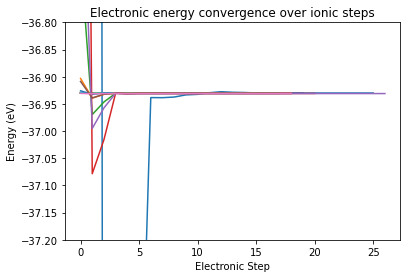

In [5]:
# Plotting
plt.xlabel("Electronic Step")
plt.ylabel("Energy (eV)")
plt.title("Electronic energy convergence over ionic steps")
for i in range(0, len(energyMatrix)):
    plt.plot(indexer[i], energyMatrix[i], label='Step {}'.format(i+1))
# plt.legend()
plt.ylim(-37.2, -36.8)

## DOS

In [6]:
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

# Get the full run daga and extract DOS
run = Vasprun("vasprun.xml", parse_projected_eigen=True)
dos = run.tdos

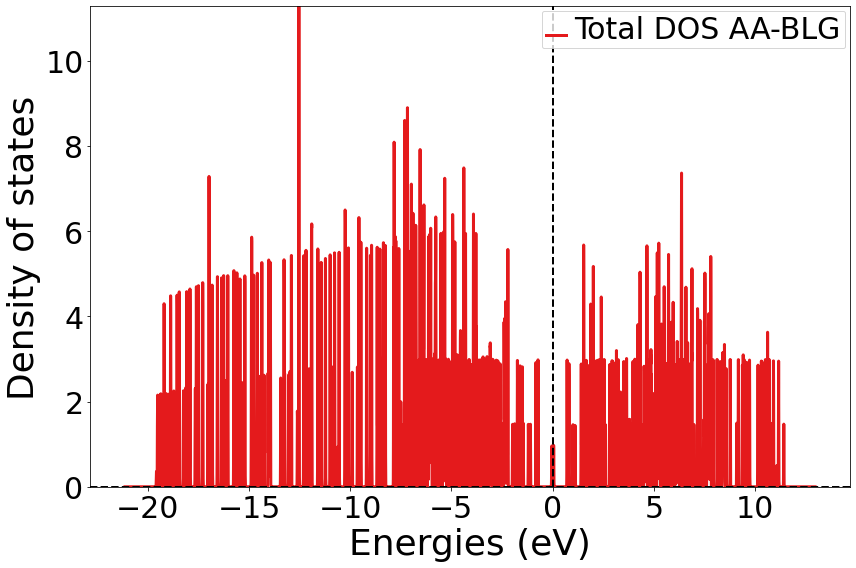

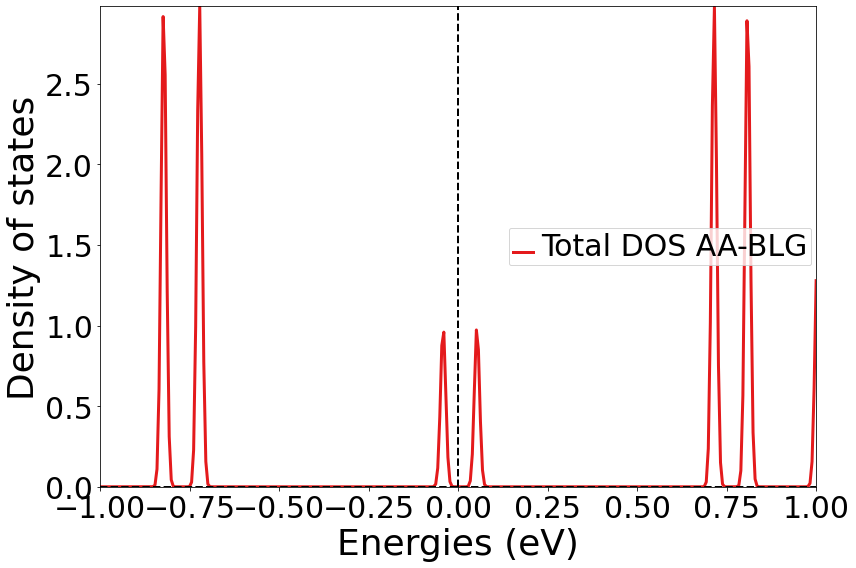

In [7]:
dosplot = DosPlotter()
dosplot.add_dos("Total DOS AA-BLG", dos)
dosplot.save_plot("AA-BLG_DOS_wide.png", "png")
dosplot.save_plot("AA-BLG_DOS_narrow.png", "png", [-1, 1])